In [1]:
import numpy as np
import pandas as pd

In [13]:
df=pd.read_csv("C:\\Users\\Shree Com\\Desktop\\Data\\placement.csv")


In [14]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

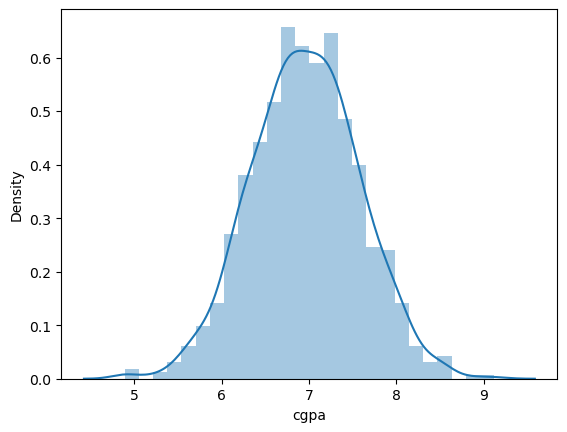

In [18]:
sns.distplot(df["cgpa"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

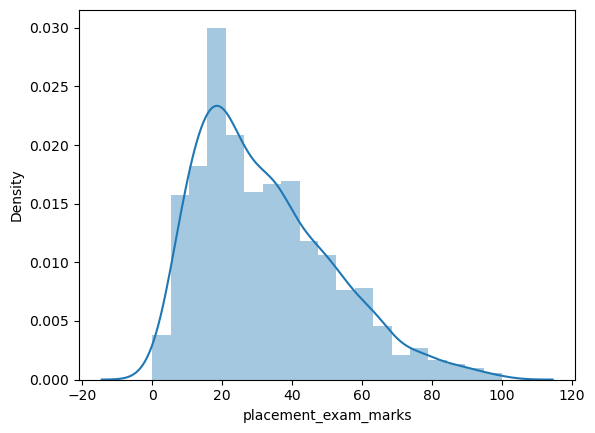

In [19]:
sns.distplot(df["placement_exam_marks"])

In [21]:
upper_limit=df["cgpa"].mean()+3*df["cgpa"].std()
lower_limit=df["cgpa"].mean()-3*df["cgpa"].std()

In [22]:
upper_limit

8.808933625397177

In [23]:
lower_limit


5.113546374602842

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

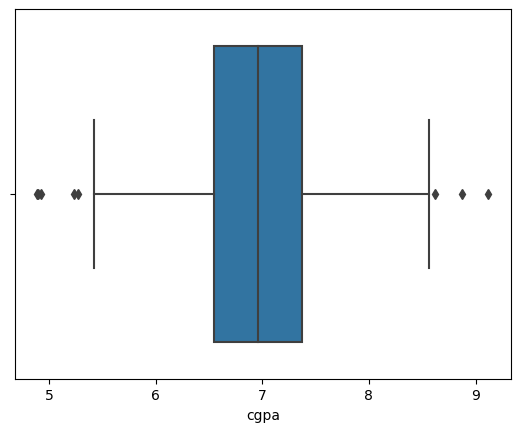

In [24]:
sns.boxplot(df["cgpa"])

In [34]:
df[(df["cgpa"]>upper_limit)]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [35]:
df[df["cgpa"]<lower_limit]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# trimming process


In [49]:
new_df=df[(df["cgpa"]<upper_limit) & (df["cgpa"]>lower_limit) ]

In [45]:
df["z_score"]=(df['cgpa']-df["cgpa"].mean())/df["cgpa"].std()

In [46]:
df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [47]:
df[df["z_score"]>3]

,cgpa,placement_exam_marks,placed,z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [50]:
df[df["z_score"]<-3]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# capping process

In [51]:
new_df_cap=df

In [53]:
new_df_cap["cgpa"]=np.where(new_df_cap["cgpa"]>upper_limit,
                           upper_limit,
                           np.where(new_df_cap["cgpa"]<lower_limit,
                                   lower_limit,
                                   new_df_cap["cgpa"],
                                   ))